## Efficient frontier 2

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import AKCRiskKit as ark 
import matplotlib 

In [2]:
ind = ark.get_ind_returns()
er = ark.annualized_returns(ind['1996':'2000'],12)
covr = ind['1996':'2000'].cov()

In [3]:
l = ["Beer","Food","Smoke","Coal"]


In [4]:
er[l]

Beer     0.141126
Food     0.116799
Smoke    0.107830
Coal     0.414689
dtype: float64

In [5]:
covr.loc[l,l]

,Beer,Food,Smoke,Coal
Beer,0.005264,0.002379,0.001359,0.001728
Food,0.002379,0.002609,0.002061,0.000027
Smoke,0.001359,0.002061,0.008349,-0.000733
Coal,0.001728,0.000027,-0.000733,0.018641


In [6]:
weights = np.repeat(1/4,4)
ark.portfolio_return(weights, er[l])

0.19511097196038385

In [7]:
ark.portfolio_vol(weights,covr.loc[l,l])

0.055059195776437045

## 2 Asset Frontier

In [8]:
l = ["Games","Fin"]

In [9]:
n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]

In [10]:
l = ["Fin","Beer"]

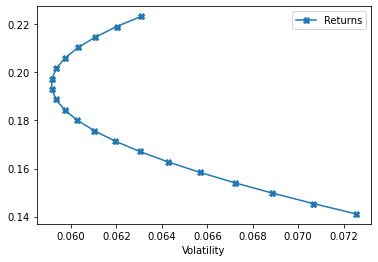

In [11]:
ark.plt_ef2(20,er[l],covr.loc[l,l],style="X-")

## N Asset Efficient Frontier

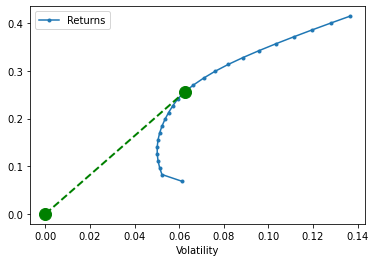

In [12]:
l = ["Smoke","Fin","Games","Coal"]
ark.plt_efn(25,er[l],covr.loc[l,l])

## Lack of Robustness of Markowitz Procedure and Global Minimum Volatity portfolio 

In [13]:
l = ["Food","Steel"]
ark.msr(0.1,er[l],covr.loc[l,l])

array([0.75040362, 0.24959638])

In [14]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [15]:
ark.msr(0.1,np.array([.1,.12]),covr.loc[l,l])

array([8.50014503e-17, 1.00000000e+00])

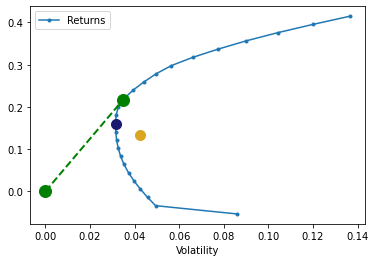

In [23]:
ark.plt_efn(25,er,covr,show_ew=True,show_gmv=True)